In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import src.utils as utils

In [2]:
# Read simulation outputs

# Peer-Nomination Network
file = open('../output/simulation/nomination/list_pre_results_class.obj', 'rb')
list_pre_results_class_nom = pickle.load(file)

file = open('../output/simulation/nomination/list_results_class.obj', 'rb')
list_results_class_nom = pickle.load(file)

# Online-Communication Network
file = open('../output/simulation/communication/list_pre_results_class.obj', 'rb')
list_pre_results_class_com = pickle.load(file)

file = open('../output/simulation/communication/list_results_class.obj', 'rb')
list_results_class_com = pickle.load(file)


# Read input variables
input_args = utils.load_input_args('../input/simulation.json')




## Postprocessing Simulation Output

### Step 1: Calculate mean per run

In [3]:
#############################
## Peer-Nomination Network ##
#############################

by_run_noint_nom = []
by_run_indegree_nom = []
by_run_betweenness_nom = []
by_run_closeness_nom = []
for run in range(len(list_results_class_nom)):
    by_run_noint_nom.append(pd.DataFrame(list_results_class_nom[run]['nointervention']).mean(axis=1))
    by_run_indegree_nom.append(pd.DataFrame(list_results_class_nom[run]['indegree']).mean(axis=1))
    by_run_betweenness_nom.append(pd.DataFrame(list_results_class_nom[run]['betweenness']).mean(axis=1))
    by_run_closeness_nom.append(pd.DataFrame(list_results_class_nom[run]['closeness']).mean(axis=1))

out_noint_nom = pd.concat(by_run_noint_nom, axis =1)
out_indegree_nom = pd.concat(by_run_indegree_nom, axis =1)
out_betweenness_nom = pd.concat(by_run_betweenness_nom, axis =1)
out_closeness_nom = pd.concat(by_run_closeness_nom, axis =1)

##################################
## Online-Communication Network ##
##################################

by_run_noint_com = []
by_run_indegree_com = []
by_run_betweenness_com = []
by_run_closeness_com = []
for run in range(len(list_results_class_com)):
    by_run_noint_com.append(pd.DataFrame(list_results_class_com[run]['nointervention']).mean(axis=1))
    by_run_indegree_com.append(pd.DataFrame(list_results_class_com[run]['indegree']).mean(axis=1))
    by_run_betweenness_com.append(pd.DataFrame(list_results_class_com[run]['betweenness']).mean(axis=1))
    by_run_closeness_com.append(pd.DataFrame(list_results_class_com[run]['closeness']).mean(axis=1))

out_noint_com = pd.concat(by_run_noint_com, axis =1)
out_indegree_com = pd.concat(by_run_indegree_com, axis =1)
out_betweenness_com = pd.concat(by_run_betweenness_com, axis =1)
out_closeness_com = pd.concat(by_run_closeness_com, axis =1)


### Step 2: calculate mean, median, 95%CI over 100 runs

In [9]:

#####################
## Peer nomination ##
#####################

out_noint_nom_sr = out_noint_nom.div(out_noint_nom.iloc[0])
n_nom_sr = (out_noint_nom_sr.mean(axis=1) -1) *100
n_nom_sr_med = (out_noint_nom_sr.median(axis=1) -1) *100
n_nom_sr_min = (out_noint_nom_sr.quantile(q=0.025, axis=1) -1) *100
n_nom_sr_max = (out_noint_nom_sr.quantile(q=0.975, axis=1) -1) *100

out_indegree_nom_sr  = out_indegree_nom.div(out_indegree_nom.iloc[0])
i_nom_sr = (out_indegree_nom_sr.mean(axis=1) -1) *100
i_nom_sr_med = (out_indegree_nom_sr.median(axis=1) -1) *100
i_nom_sr_min = (out_indegree_nom_sr.quantile(q=0.05, axis=1) -1) *100
i_nom_sr_max = (out_indegree_nom_sr.quantile(q=0.95, axis=1) -1) *100

out_betweenness_nom_sr  = out_betweenness_nom.div(out_betweenness_nom.iloc[0])
b_nom_sr = (out_betweenness_nom_sr.mean(axis=1) -1) *100
b_nom_sr_med = (out_betweenness_nom_sr.median(axis=1) -1) *100
b_nom_sr_min = (out_betweenness_nom_sr.quantile(q=0.025, axis=1) -1) *100
b_nom_sr_max = (out_betweenness_nom_sr.quantile(q=0.975, axis=1) -1) *100

out_closeness_nom_sr  = out_closeness_nom.div(out_closeness_nom.iloc[0])
c_nom_sr = (out_closeness_nom_sr.mean(axis=1) -1) *100
c_nom_sr_med = (out_closeness_nom_sr.median(axis=1) -1) *100
c_nom_sr_min = (out_closeness_nom_sr.quantile(q=0.025, axis=1) -1) *100
c_nom_sr_max = (out_closeness_nom_sr.quantile(q=0.975, axis=1) -1) *100

# mean and confidence intervals at day 700
print('nom nointervention: mean =', n_nom_sr[699], 'med', n_nom_sr_med[699], '(95%CI =', n_nom_sr_min[699], ',', n_nom_sr_max[699], ')')
print('nom indegree: mean =', i_nom_sr[699], 'med', i_nom_sr_med[699], '(95%CI =', i_nom_sr_min[699], ',', i_nom_sr_max[699], ')')
print('nom betweenness: mean =', b_nom_sr[699], 'med', b_nom_sr_med[699], '(95%CI =', b_nom_sr_min[699], ',', b_nom_sr_max[699], ')')
print('nom closeness: mean =', c_nom_sr[699], 'med', c_nom_sr_med[699], '(95%CI =', c_nom_sr_min[699], ',', c_nom_sr_max[699], ')')
#print('nom indegree: mean =', i_nom_sr[0], '(95%CI =', i_nom_sr_min[0], ',', i_nom_sr_max[0], ')')
#print('nom betweenness: mean =', b_nom_sr[0], '(95%CI =', b_nom_sr_min[0], ',', b_nom_sr_max[0], ')')
#print('nom closeness: mean =', c_nom_sr[0], '(95%CI =', c_nom_sr_min[0], ',', c_nom_sr_max[0], ')')


##########################
## Online communication ##
##########################

out_noint_com_sr = out_noint_com.div(out_noint_com.iloc[0])
n_com_sr = (out_noint_com_sr.mean(axis=1) -1) *100
n_com_sr_med = (out_noint_com_sr.median(axis=1) -1) *100
n_com_sr_min = (out_noint_com_sr.quantile(q=0.025, axis=1) -1) *100
n_com_sr_max = (out_noint_com_sr.quantile(q=0.975, axis=1) -1) *100

out_indegree_com_sr  = out_indegree_com.div(out_indegree_com.iloc[0])
i_com_sr = (out_indegree_com_sr.mean(axis=1) -1) *100
i_com_sr_med = (out_indegree_com_sr.median(axis=1) -1) *100
i_com_sr_min = (out_indegree_com_sr.quantile(q=0.025, axis=1) -1) *100
i_com_sr_max = (out_indegree_com_sr.quantile(q=0.975, axis=1) -1) *100

out_betweenness_com_sr  = out_betweenness_com.div(out_betweenness_com.iloc[0])
b_com_sr = (out_betweenness_com_sr.mean(axis=1) -1) *100
b_com_sr_med = (out_betweenness_com_sr.median(axis=1) -1) *100
b_com_sr_min = (out_betweenness_com_sr.quantile(q=0.025, axis=1) -1) *100
b_com_sr_max = (out_betweenness_com_sr.quantile(q=0.975, axis=1) -1) *100

out_closeness_com_sr  = out_closeness_com.div(out_closeness_com.iloc[0])
c_com_sr = (out_closeness_com_sr.mean(axis=1) -1) *100
c_com_sr_med = (out_closeness_com_sr.median(axis=1) -1) *100
c_com_sr_min = (out_closeness_com_sr.quantile(q=0.025, axis=1) -1) *100
c_com_sr_max = (out_closeness_com_sr.quantile(q=0.975, axis=1) -1) *100

# mean and confidence intervals at day 700
print('com nointervention: mean =', n_com_sr[699], 'med', n_com_sr_med[699],'(95%CI =', n_com_sr_min[699], ',', n_com_sr_max[699], ')')
print('com indegree: mean =', i_com_sr[699], 'med', i_com_sr_med[699], '(95%CI =', i_com_sr_min[699], ',', i_com_sr_max[699], ')')
print('com betweenness: mean =', b_com_sr[699], 'med', b_com_sr_med[699], '(95%CI =', b_com_sr_min[699], ',', b_com_sr_max[699], ')')
print('com closeness: mean =', c_com_sr[699], 'med', c_com_sr_med[699], '(95%CI =', c_com_sr_min[699], ',', c_com_sr_max[699], ')')
#print('com indegree: mean =', i_com_sr[0], '(95%CI =', i_com_sr_min[0], ',', i_com_sr_max[0], ')')
#print('com betweenness: mean =', b_com_sr[0], '(95%CI =', b_com_sr_min[0], ',', b_com_sr_max[0], ')')
#print('com closeness: mean =', c_com_sr[0], '(95%CI =', c_com_sr_min[0], ',', c_com_sr_max[0], ')')


# for boxplot of variation at day 700
day = 200
nom_var = {'In-degree': (out_indegree_nom.iloc[day] / out_indegree_nom.iloc[0] - 1) * 100,
           'Betweenness': (out_betweenness_nom.iloc[day] / out_betweenness_nom.iloc[0] - 1) * 100,
           'Closeness': (out_closeness_nom.iloc[day] / out_closeness_nom.iloc[0] - 1) * 100}

com_var = {'In-degree': (out_indegree_com.iloc[day] / out_indegree_com.iloc[0] - 1) * 100,
           'Betweenness': (out_betweenness_com.iloc[day] / out_betweenness_com.iloc[0] - 1) * 100,
           'Closeness': (out_closeness_com.iloc[day] / out_closeness_com.iloc[0] - 1) * 100}

nom nointervention: mean = 0.02255233385515254 med 0.0 (95%CI = 0.0 , 0.16938050079176037 )
nom indegree: mean = 12.609984067210167 med 6.894040657839451 (95%CI = 6.116492811618479 , 14.636426239543376 )
nom betweenness: mean = 14.829859384951916 med 5.554025443401955 (95%CI = 4.641155252253348 , 134.2878991286959 )
nom closeness: mean = 12.270249443686133 med 6.83717111370572 (95%CI = 6.069539585355055 , 103.7563503050873 )
com nointervention: mean = 0.024767293984129246 med 0.0 (95%CI = 0.0 , 0.07406190895444809 )
com indegree: mean = 5.7044710110555785 med 5.237087069548418 (95%CI = 4.45925878756861 , 6.095186990386581 )
com betweenness: mean = 5.788703783356208 med 5.40067451968731 (95%CI = 4.462150027317668 , 5.891816291138441 )
com closeness: mean = 5.811272483893326 med 5.476197920367376 (95%CI = 4.447081001288011 , 6.065986640379117 )


# Plots of Simulation Output

### 1. PAL

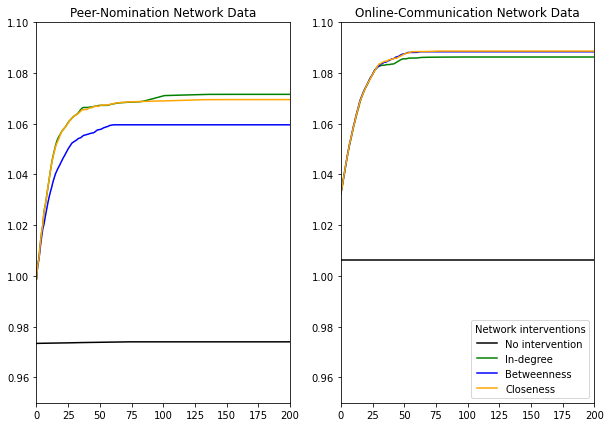

In [12]:
# Plots
ticks = np.arange(1.40, 1.60, 0.01)
x = np.arange(0,700,1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))

ax1.set_title('Peer-Nomination Network Data')
ax1.set_ylim([0.95, 1.1])
ax1.set_xlim([0,200])
#ax1.set_ylim([1.4, 1.6])
ax1.plot(x, out_noint_nom.median(axis=1), color='black')
ax1.plot(x, out_indegree_nom.median(axis=1), color='green')
#plt.fill_between(x, i_nom_min, i_nom_max, alpha=0.2, color='C5')
ax1.plot(x, out_betweenness_nom.median(axis=1), color='blue')
#plt.fill_between(x, b_nom_min, b_nom_max, alpha=0.2, color='C0')
ax1.plot(x, out_closeness_nom.median(axis=1), color='orange')
#plt.fill_between(x, c_nom_min, c_nom_max, alpha=0.2, color='C3')

ax2.set_title('Online-Communication Network Data')
ax2.set_ylim([0.95, 1.1])
ax2.set_xlim([0,200])
ax2.plot(x, out_noint_com.median(axis=1), color='black')
ax2.plot(x, out_indegree_com.median(axis=1), color='green')
#plt.fill_between(x, i_com_min, i_com_max, alpha=0.2, color='C5')
ax2.plot(x, out_betweenness_com.median(axis=1), color='blue')
#plt.fill_between(x, b_com_min, b_com_max, alpha=0.2, color='C0')
ax2.plot(x, out_closeness_com.median(axis=1), color='orange')
#plt.fill_between(x, c_com_min, c_com_max, alpha=0.2, color='C3')
ax2.legend(['No intervention', 'In-degree', 'Betweenness', 'Closeness'], loc='lower right', title="Network interventions")


In [13]:
fig.savefig('../output/plots/fig_pal_trend.eps', bbox_inches='tight', format='eps', dpi=1000)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


## 2. Impact on PAL: success rate (used in paper)

[Text(1, 0, 'In-degree'), Text(2, 0, 'Betweenness'), Text(3, 0, 'Closeness')]

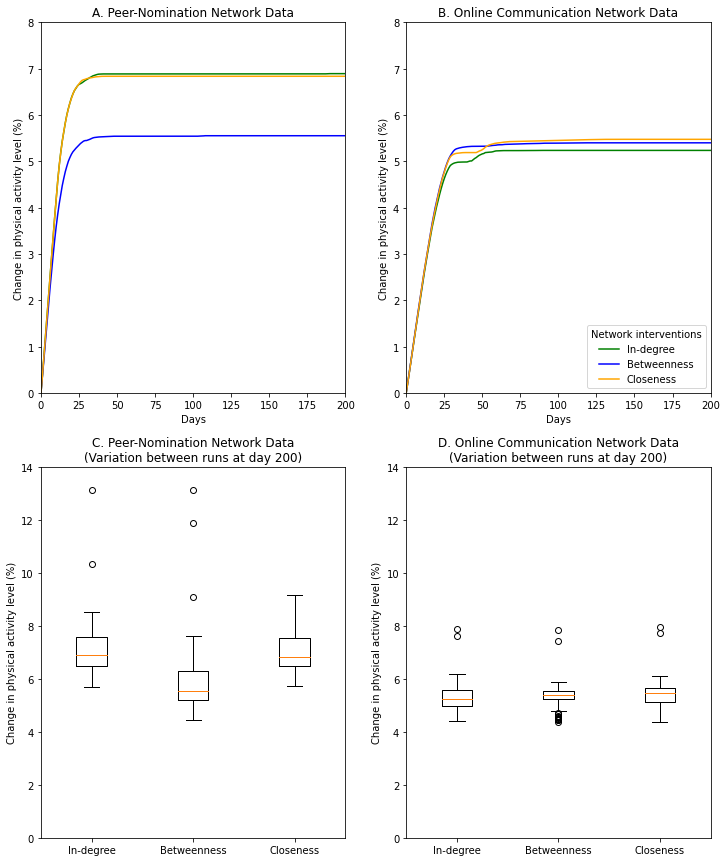

In [37]:
# Plot (without confidence intervals): used in paper

ticks = np.arange(1.40, 1.60, 0.01)
x = np.arange(0, 700, 1)

fig, axs = plt.subplots(2, 2, figsize=(12, 15))

axs[0,0].set_title('A. Peer-Nomination Network Data')
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('Change in physical activity level (%)')
axs[0,0].set_ylim([0, 8])
axs[0,0].set_xlim([0,200])
axs[0,0].plot(x, i_nom_sr_med, color='green')
axs[0,0].plot(x, b_nom_sr_med, color='blue')
axs[0,0].plot(x, c_nom_sr_med, color='orange')

axs[0,1].set_title('B. Online Communication Network Data')
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('Change in physical activity level (%)')
axs[0,1].set_ylim([0, 8])
axs[0,1].set_xlim([0,200])
axs[0,1].plot(x, i_com_sr_med, color='green')
axs[0,1].plot(x, b_com_sr_med, color='blue')
axs[0,1].plot(x, c_com_sr_med, color='orange')
axs[0,1].legend(['In-degree', 'Betweenness', 'Closeness'], loc='lower right', title="Network interventions")

axs[1,0].set_title('C. Peer-Nomination Network Data\n(Variation between runs at day 200)')
axs[1,0].set_ylabel('Change in physical activity level (%)')
axs[1,0].set_ylim([0, 14])
axs[1,0].boxplot(nom_var.values())
axs[1,0].set_xticklabels(nom_var.keys())

axs[1,1].set_title('D. Online Communication Network Data\n(Variation between runs at day 200)')
axs[1,1].set_ylabel('Change in physical activity level (%)')
axs[1,1].set_ylim([0, 14])
axs[1,1].boxplot(com_var.values())
axs[1,1].set_xticklabels(com_var.keys())




In [38]:
fig.savefig('../output/plots/fig_impact.eps', bbox_inches='tight', format='eps', dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


## 2. Variation between classes (used in paper)

#### Refactoring dataframe

In [19]:
# Peer-Nomination Network Data
by_class_noint_nom = []
by_class_indegree_nom = []
by_class_betweenness_nom = []
by_class_closeness_nom = []

for class_id in input_args['classes']:
    temp_by_run_noint = []
    temp_by_run_indegree = []
    temp_by_run_betweenness = []
    temp_by_run_closeness = []

    for run in range(len(list_results_class_nom)):
        temp_by_run_noint.append(pd.DataFrame(list_results_class_nom[run]['nointervention'][str(class_id)]))
        temp_by_run_indegree.append(pd.DataFrame(list_results_class_nom[run]['indegree'][str(class_id)]))
        temp_by_run_betweenness.append(pd.DataFrame(list_results_class_nom[run]['betweenness'][str(class_id)]))
        temp_by_run_closeness.append(pd.DataFrame(list_results_class_nom[run]['closeness'][str(class_id)]))

    # concat to dataframe
    temp_noint = pd.concat(temp_by_run_noint, axis =1)
    temp_indegree = pd.concat(temp_by_run_indegree, axis =1)
    temp_betweenness = pd.concat(temp_by_run_betweenness, axis =1)
    temp_closeness = pd.concat(temp_by_run_closeness, axis =1)

    # only select day 700
    day = 200
    by_class_noint_nom.append((temp_noint.iloc[day]/temp_noint.iloc[0] -1) * 100)
    by_class_indegree_nom.append((temp_indegree.iloc[day]/temp_indegree.iloc[0] -1) * 100)
    by_class_betweenness_nom.append((temp_betweenness.iloc[day]/temp_betweenness.iloc[0] -1) * 100)
    by_class_closeness_nom.append((temp_closeness.iloc[day]/temp_closeness.iloc[0] -1) * 100)

# Dataframe cols=class, rows= results of day 700 per run
class_noint_nom = pd.concat(by_class_noint_nom, axis=1)
class_indegree_nom = pd.concat(by_class_indegree_nom, axis=1)
class_betweenness_nom = pd.concat(by_class_betweenness_nom, axis=1)
class_closeness_nom = pd.concat(by_class_closeness_nom, axis=1)


In [20]:
# Online-Communication Network Data
by_class_noint_com = []
by_class_indegree_com = []
by_class_betweenness_com = []
by_class_closeness_com = []

for class_id in input_args['classes']:
    temp_by_run_noint = []
    temp_by_run_indegree = []
    temp_by_run_betweenness = []
    temp_by_run_closeness = []

    for run in range(len(list_results_class_nom)):
        temp_by_run_noint.append(pd.DataFrame(list_results_class_com[run]['nointervention'][str(class_id)]))
        temp_by_run_indegree.append(pd.DataFrame(list_results_class_com[run]['indegree'][str(class_id)]))
        temp_by_run_betweenness.append(pd.DataFrame(list_results_class_com[run]['betweenness'][str(class_id)]))
        temp_by_run_closeness.append(pd.DataFrame(list_results_class_com[run]['closeness'][str(class_id)]))

    temp_noint = pd.concat(temp_by_run_noint, axis =1)
    temp_indegree = pd.concat(temp_by_run_indegree, axis =1)
    temp_betweenness = pd.concat(temp_by_run_betweenness, axis =1)
    temp_closeness = pd.concat(temp_by_run_closeness, axis =1)

    # only select day 200
    day = 200
    by_class_noint_com.append((temp_noint.iloc[day]/temp_noint.iloc[0] -1) * 100)
    by_class_indegree_com.append((temp_indegree.iloc[day]/temp_indegree.iloc[0] -1) * 100)
    by_class_betweenness_com.append((temp_betweenness.iloc[day]/temp_betweenness.iloc[0] -1) * 100)
    by_class_closeness_com.append((temp_closeness.iloc[day]/temp_closeness.iloc[0] -1) * 100)

# Dataframe cols=class, rows= results of day 700 per run
class_noint_com = pd.concat(by_class_noint_com, axis=1)
class_indegree_com = pd.concat(by_class_indegree_com, axis=1)
class_betweenness_com = pd.concat(by_class_betweenness_com, axis=1)
class_closeness_com = pd.concat(by_class_closeness_com, axis=1)

#### boxplot

Text(0.5, 0, 'Class ID')

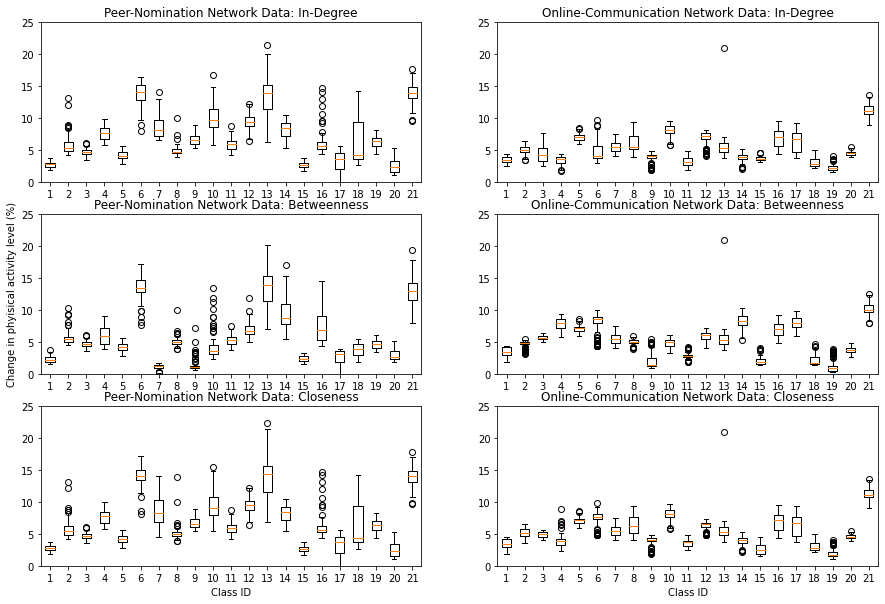

In [46]:
fig, axs = plt.subplots(3, 2, figsize=(15,10))

axs[0,0].set_title('Peer-Nomination Network Data: In-Degree')
axs[0,0].set_ylim([0, 25])
axs[0,0].boxplot(class_indegree_nom)

axs[0,1].set_title('Online-Communication Network Data: In-Degree')
axs[0,1].set_ylim([0, 25])
axs[0,1].boxplot(class_indegree_com)

axs[1,0].set_title('Peer-Nomination Network Data: Betweenness')
axs[1,0].set_ylabel('Change in phyisical activity level (%)')
axs[1,0].set_ylim([0, 25])
axs[1,0].boxplot(class_betweenness_nom)

axs[1,1].set_title('Online-Communication Network Data: Betweenness')
axs[1,1].set_ylim([0, 25])
axs[1,1].boxplot(class_betweenness_com)

axs[2,0].set_title('Peer-Nomination Network Data: Closeness')
axs[2,0].set_ylim([0, 25])
axs[2,0].boxplot(class_closeness_nom)
axs[2,0].set_xlabel('Class ID')

axs[2,1].set_title('Online-Communication Network Data: Closeness')
axs[2,1].set_ylim([0, 25])
axs[2,1].boxplot(class_closeness_com)
axs[2,1].set_xlabel('Class ID')


In [47]:
fig.savefig('../output/plots/fig_classvariation_detailed.eps', bbox_inches='tight', format='eps', dpi=1000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


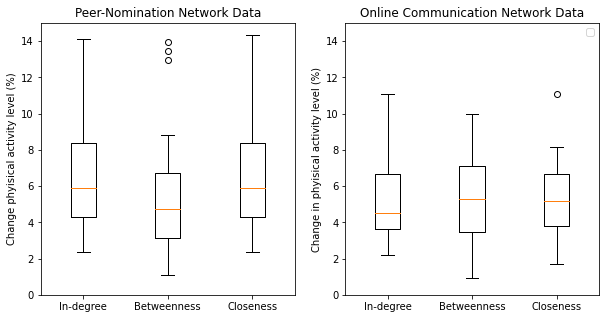

In [41]:

nom_clvar = {'In-degree': class_indegree_nom.median(axis=0),
           'Betweenness': class_betweenness_nom.median(axis=0),
           'Closeness': class_closeness_nom.median(axis=0)}

com_clvar = {'In-degree': class_indegree_com.median(axis=0),
           'Betweenness': class_betweenness_com.median(axis=0),
           'Closeness': class_closeness_com.median(axis=0)}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Peer-Nomination Network Data')
ax1.set_ylabel('Change phyisical activity level (%)')
ax1.set_ylim([0, 15])
ax1.boxplot(nom_clvar.values())
ax1.set_xticklabels(nom_clvar.keys())
#ax1.set_xlabel('Network intervention strategy')

ax2.set_title('Online Communication Network Data')
ax2.set_ylabel('Change in phyisical activity level (%)')
ax2.set_ylim([0, 15])
ax2.boxplot(com_clvar.values())
ax2.set_xticklabels(com_clvar.keys())
#ax2.set_xlabel('Network intervention strategy')

plt.legend()
plt.show()




In [42]:
fig.savefig('../output/plots/fig_classvariation.eps', bbox_inches='tight', format='eps', dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [43]:
df_nom_clvar = pd.DataFrame(nom_clvar)
df_nom_clvar

,In-degree,Betweenness,Closeness
0,2.754896,2.253876,2.754896
1,5.387704,5.442293,5.387704
2,4.723355,4.723355,4.723355
3,7.750401,5.866403,7.750401
4,4.143926,4.143926,4.143926
5,14.124038,13.482261,14.027204
6,8.124229,1.185799,8.192672
7,4.763539,5.015699,5.015699
8,6.530802,1.096607,6.530802
9,9.727503,3.570808,9.044765


In [44]:
print(df_nom_clvar.median(), df_nom_clvar.min(), df_nom_clvar.max())

In-degree      5.886388
Betweenness    4.723355
Closeness      5.886388
dtype: float64 In-degree      2.350982
Betweenness    1.096607
Closeness      2.350982
dtype: float64 In-degree      14.124038
Betweenness    13.933642
Closeness      14.316128
dtype: float64


In [45]:
df_com_clvar = pd.DataFrame(com_clvar)
df_com_clvar

,In-degree,Betweenness,Closeness
0,3.408590,3.482567,3.482567
1,4.967948,4.834310,5.195819
2,4.267935,5.665902,5.019557
3,3.554572,7.970627,3.807443
4,7.118769,7.118769,7.118769
5,4.039193,8.612946,7.651459
6,5.461376,5.461376,5.461376
7,5.424448,5.055570,6.252512
8,4.092869,1.375235,4.092869
9,8.132148,4.968294,8.132148


In [27]:
print(df_com_clvar.median(), df_com_clvar.min(), df_com_clvar.max())

In-degree      4.538967
Betweenness    5.296245
Closeness      5.195819
dtype: float64 In-degree      2.205139
Betweenness    0.914520
Closeness      1.696261
dtype: float64 In-degree      11.102924
Betweenness     9.952344
Closeness      11.102924
dtype: float64


### Check for outliers

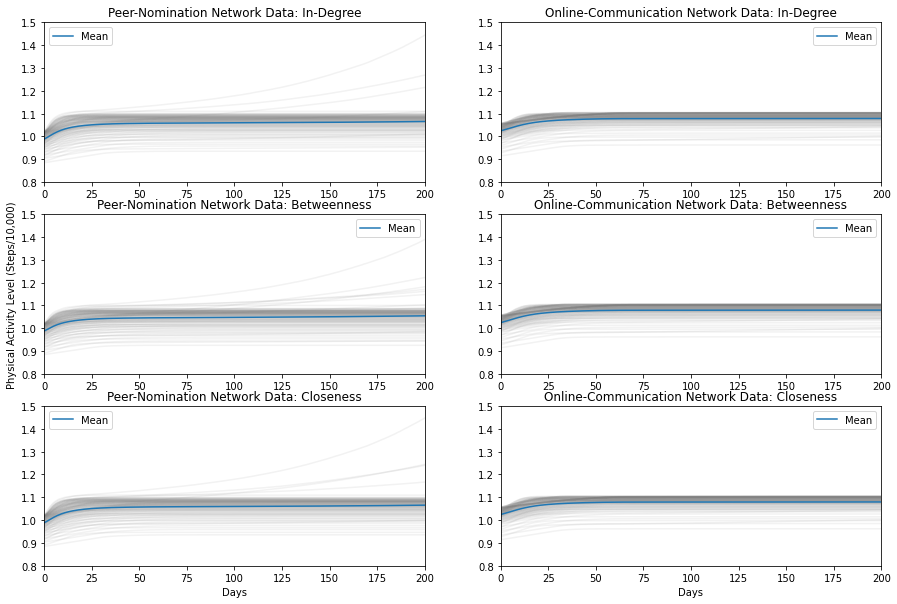

In [31]:
fig, axs = plt.subplots(3, 2, figsize=(15,10))

axs[0,0].set_title('Peer-Nomination Network Data: In-Degree')
axs[0,0].set_xlim([0,200])
axs[0,0].set_ylim([0.8,1.5])
axs[0,0].plot(out_indegree_nom, color='grey', alpha=0.1)
axs[0,0].plot(out_indegree_nom.mean(axis=1), label="Mean")
axs[0,0].legend()

axs[0,1].set_title('Online-Communication Network Data: In-Degree')
axs[0,1].set_xlim([0,200])
axs[0,1].set_ylim([0.8,1.5])
axs[0,1].plot(out_indegree_com, color='grey', alpha=0.1)
axs[0,1].plot(out_indegree_com.mean(axis=1), label="Mean")
axs[0,1].legend()

axs[1,0].set_title('Peer-Nomination Network Data: Betweenness')
axs[1,0].set_xlim([0,200])
axs[1,0].set_ylim([0.8,1.5])
axs[1,0].set_ylabel('Physical Activity Level (Steps/10,000)')
axs[1,0].plot(out_betweenness_nom, color='grey', alpha=0.1)
axs[1,0].plot(out_betweenness_nom.mean(axis=1), label="Mean")
axs[1,0].legend()

axs[1,1].set_title('Online-Communication Network Data: Betweenness')
axs[1,1].set_xlim([0,200])
axs[1,1].set_ylim([0.8,1.5])
axs[1,1].plot(out_betweenness_com, color='grey', alpha=0.1)
axs[1,1].plot(out_betweenness_com.mean(axis=1), label="Mean")
axs[1,1].legend()

axs[2,0].set_title('Peer-Nomination Network Data: Closeness')
axs[2,0].set_xlim([0,200])
axs[2,0].set_ylim([0.8,1.5])
axs[2,0].set_xlabel('Days')
axs[2,0].plot(out_closeness_nom, color='grey', alpha=0.1)
axs[2,0].plot(out_closeness_nom.mean(axis=1), label="Mean")
axs[2,0].legend()

axs[2,1].set_title('Online-Communication Network Data: Closeness')
axs[2,1].set_xlim([0,200])
axs[2,1].set_ylim([0.8,1.5])
axs[2,1].set_xlabel('Days')
axs[2,1].plot(out_closeness_com, color='grey', alpha=0.1)
axs[2,1].plot(out_closeness_com.mean(axis=1), label="Mean")
axs[2,1].legend()

In [38]:
# remove outliers #

out_indegree_nom[999:1000] = out_indegree_nom[999:1000].where(out_indegree_nom[999:1000] < 1.2)
out_indegree_nom2 = out_indegree_nom.dropna(axis=1)

out_indegree_com[999:1000] = out_indegree_com[999:1000].where(out_indegree_com[999:1000] < 1.2)
out_indegree_com2 = out_indegree_com.dropna(axis=1)

out_betweenness_nom[999:1000] = out_betweenness_nom[999:1000].where(out_betweenness_nom[999:1000] < 1.2)
out_betweenness_nom2 = out_betweenness_nom.dropna(axis=1)

out_betweenness_com[999:1000] = out_betweenness_com[999:1000].where(out_betweenness_com[999:1000] < 1.2)
out_betweenness_com2 = out_betweenness_com.dropna(axis=1)

out_closeness_nom[999:1000] = out_closeness_nom[999:1000].where(out_closeness_nom[999:1000] < 1.2)
out_closeness_nom2 = out_closeness_nom.dropna(axis=1)

out_closeness_com[999:1000] = out_closeness_com[999:1000].where(out_closeness_com[999:1000] < 1.2)
out_closeness_com2 = out_closeness_com.dropna(axis=1)


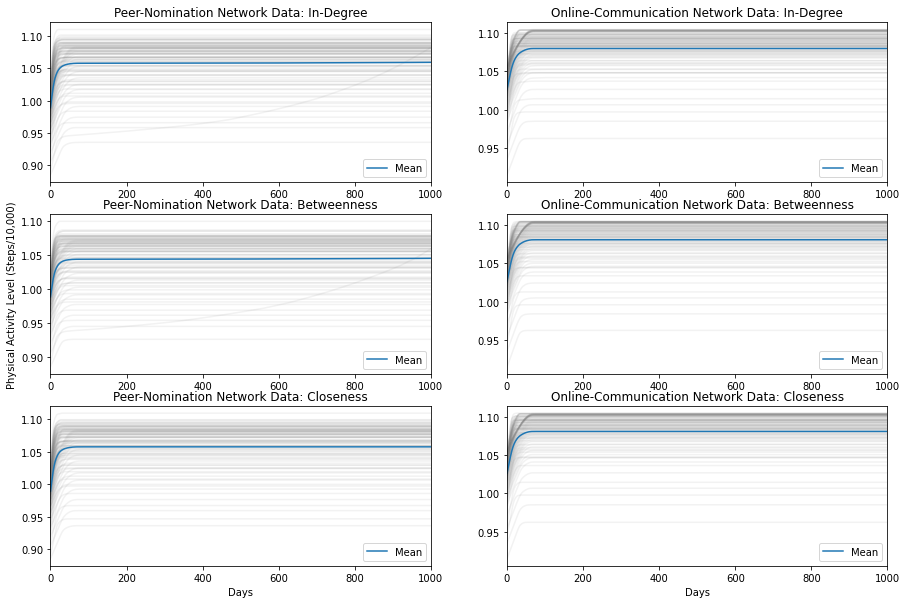

In [89]:
fig, axs = plt.subplots(3, 2, figsize=(15,10))

axs[0,0].set_title('Peer-Nomination Network Data: In-Degree')
axs[0,0].set_xlim([0,1000])
axs[0,0].plot(out_indegree_nom2, color='grey', alpha=0.1)
axs[0,0].plot(out_indegree_nom2.mean(axis=1), label="Mean")
axs[0,0].legend()

axs[0,1].set_title('Online-Communication Network Data: In-Degree')
axs[0,1].set_xlim([0,1000])
axs[0,1].plot(out_indegree_com2, color='grey', alpha=0.1)
axs[0,1].plot(out_indegree_com2.mean(axis=1), label="Mean")
axs[0,1].legend()

axs[1,0].set_title('Peer-Nomination Network Data: Betweenness')
axs[1,0].set_xlim([0,1000])
axs[1,0].set_ylabel('Physical Activity Level (Steps/10,000)')
axs[1,0].plot(out_betweenness_nom2, color='grey', alpha=0.1)
axs[1,0].plot(out_betweenness_nom2.mean(axis=1), label="Mean")
axs[1,0].legend()

axs[1,1].set_title('Online-Communication Network Data: Betweenness')
axs[1,1].set_xlim([0,1000])
axs[1,1].plot(out_betweenness_com2, color='grey', alpha=0.1)
axs[1,1].plot(out_betweenness_com2.mean(axis=1), label="Mean")
axs[1,1].legend()

axs[2,0].set_title('Peer-Nomination Network Data: Closeness')
axs[2,0].set_xlim([0,1000])
axs[2,0].set_xlabel('Days')
axs[2,0].plot(out_closeness_nom2, color='grey', alpha=0.1)
axs[2,0].plot(out_closeness_nom2.mean(axis=1), label="Mean")
axs[2,0].legend()

axs[2,1].set_title('Online-Communication Network Data: Closeness')
axs[2,1].set_xlim([0,1000])
axs[2,1].set_xlabel('Days')
axs[2,1].plot(out_closeness_com2, color='grey', alpha=0.1)
axs[2,1].plot(out_closeness_com2.mean(axis=1), label="Mean")
axs[2,1].legend()